## **LeNet**

In [2]:
import torch.optim as optim
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
import torch
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(0.5, 0.5)
])
batch_size = 64

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
class LeNet(nn.Module):
    def __init__(self, num_classes: int = 10):
        super(LeNet, self).__init__()
        # Layer 1: Conv2D
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 2: Conv2D
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Layer 3: Fully Connected
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.relu3 = nn.ReLU()

        # Layer 4: Fully Connected
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.relu4 = nn.ReLU()

        # Layer 5: Fully Connected
        self.fc3 = nn.Linear(in_features=84, out_features=num_classes)

        self.flatten = nn.Flatten()

    def forward(self, x):
        # Layer 1: Conv2D -> ReLU -> MaxPool
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        # Layer 2: Conv2D -> ReLU -> MaxPool
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Flatten the output
        x = self.flatten(x)

        # Layer 3: Fully Connected -> ReLU
        x = self.fc1(x)
        x = self.relu3(x)

        # Layer 4: Fully Connected -> ReLU
        x = self.fc2(x)
        x = self.relu4(x)

        # Layer 5: Fully Connected
        x = self.fc3(x)

        return x

In [23]:
model = LeNet(num_classes=10)

# check if everythig is fine
x = torch.rand((2, 1, 28, 28))
logits = model(x)
print(logits.shape)

torch.Size([2, 10])


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
device = "cuda:0"
model.to(device);

In [25]:
# Train the neural network
num_epochs = 30
log_every_n_iter = 250
for epoch in range(num_epochs):
  # train loop
  model.train()
  epoch_loss = 0.0
  print(f"Epoch: {epoch}")
  for i, batch in enumerate(train_loader, 0):
    # batch --> (images, targets)
    x, targets = [el.to(device) for el in batch]
    # set optimizer a zero
    optimizer.zero_grad()
    # forward pass
    logits = model(x)
    # calcolo della loss
    loss = criterion(logits, targets)
    # backward pass
    loss.backward()
    # optimizer step --> update weights
    optimizer.step()
    epoch_loss += loss.item()
    if (i+1) % log_every_n_iter == 0:    # Print every log_every_n_iter mini-batches
        print(f"> iter [{i+1}/{len(train_loader)}] - train_loss={epoch_loss/log_every_n_iter:.4f}")
        epoch_loss = 0.0
    # test loop
  model.eval()
  test_loss = []
  total, correct = 0, 0
  with torch.no_grad():
    for batch in test_loader:
      x, targets = [el.to(device) for el in batch]
      logits = model(x)
      loss = criterion(logits, targets)
      test_loss.append(loss.item())
      # ottengo gli indici dove trovo la max probabilità
      _, preds = torch.max(logits.data, 1)
      total += targets.size(0)
      correct += (preds == targets).sum().item()

  print("Test report:")
  print(f"\t test_loss={sum(test_loss)/len(test_loss):.4f} - test_accuracy={correct/total:.4f}")

  print(" \n *************** \n")


print('Finished Training')

Epoch: 0
> iter [250/938] - train_loss=2.3000
> iter [500/938] - train_loss=2.2956
> iter [750/938] - train_loss=2.2908
Test report:
	 test_loss=2.2844 - test_accuracy=0.1157
 
 *************** 

Epoch: 1
> iter [250/938] - train_loss=2.2829
> iter [500/938] - train_loss=2.2785
> iter [750/938] - train_loss=2.2742
Test report:
	 test_loss=2.2632 - test_accuracy=0.1602
 
 *************** 

Epoch: 2
> iter [250/938] - train_loss=2.2611
> iter [500/938] - train_loss=2.2524
> iter [750/938] - train_loss=2.2409
Test report:
	 test_loss=2.2179 - test_accuracy=0.2656
 
 *************** 

Epoch: 3
> iter [250/938] - train_loss=2.2106
> iter [500/938] - train_loss=2.1863
> iter [750/938] - train_loss=2.1508
Test report:
	 test_loss=2.0797 - test_accuracy=0.5135
 
 *************** 

Epoch: 4
> iter [250/938] - train_loss=2.0502
> iter [500/938] - train_loss=1.9511
> iter [750/938] - train_loss=1.8225
Test report:
	 test_loss=1.5760 - test_accuracy=0.6544
 
 *************** 

Epoch: 5
> iter [250

### Inference

In [54]:
idx = random.randint(0, len(test_dataset))
img, target = test_dataset[idx]
print(img.shape)
# we need to augment the first dimension --> from (C, H, W) -> (B, C, H, W)
x = img.unsqueeze(0)
print(x.shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [55]:
import torch.nn.functional as F

with torch.no_grad():
  model.eval()
  x = x.to(device)
  logits = model(x)
  probs = F.softmax(logits, 1)
  print(probs.data)
  pred_prob, pred_class= torch.max(probs.data, 1)
  print(pred_class, pred_prob)

tensor([[3.8037e-05, 5.3570e-08, 7.5366e-05, 8.0543e-08, 3.1599e-05, 4.4937e-04,
         9.9937e-01, 1.1462e-10, 3.7404e-05, 2.6342e-07]], device='cuda:0')
tensor([6], device='cuda:0') tensor([0.9994], device='cuda:0')


In [56]:
np_img = img.numpy() # (C, W, H)
np_img = np.transpose(np_img, (1, 2, 0)) # (W, H, C)
print(np_img.shape)

(28, 28, 1)


Predicted class is 6 with prob=0.9994


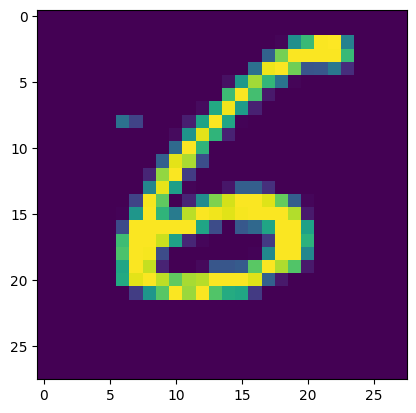

In [57]:
print(f"Predicted class is {pred_class[0]} with prob={pred_prob[0]:.4f}")
plt.imshow(np_img)